# 4. Complex oscillations

The most common use of complex numbers in physics is for analyzing oscillations and waves.  We will illustrate this with a simple but crucially important model, the **damped harmonic oscillator**.

## The harmonic oscillator equation

The damped harmonic oscillator describes a mechanical system consisting of a particle of mass $m$, subject to a spring force and a damping force.  The particle can move along one dimension, and we let $x(t)$ denote its displacement from the origin.  The damping coefficient is $2m \gamma$, and the spring constant is $k = m\omega_0^2$.  The parameters $m$, $\gamma$, and $\omega_0$ are all positive real numbers.  (The quantity $\omega_0$ is called the "natural frequency of oscillation", because in the absence of the damping force this system would act as a simple harmonic oscillator with frequency $\omega_0$.)

<img src="img/oscillator.png" alt="Mechanical model of a damped harmonic oscillator." width=30%>

The motion of the particle is described by Newton's second law:

$$m \frac{d^2 x}{dt^2} = F(x,t) = - 2m\gamma \frac{dx}{dt} - m\omega_0^2 x(t).$$

Dividing by the common factor of $m$, and bringing everything to one side, gives

$$\frac{d^2 x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega_0^2 x(t) = 0.$$

We call this ordinary differential equation the **damped harmonic oscillator equation**.  Since it's a second-order [ordinary differential equation](01_derivatives.ipynb#ODE) (ODE), the general solution must contain two independent parameters.  If we state the initial displacement and velocity, $x(0)$ and $\dot{x}(0)$, there is a unique specific solution.

<table width=75%>
<tr><td>**Note**</td></tr>
<tr><td>Sometimes, we write the damped harmonic oscillator equation a bit differently:<br/>$$\left[\frac{d^2}{dt^2} + 2\gamma \frac{d}{dt} + \omega_0^2 \right]\, x(t) = 0.$$<br/>The quantity in the square brackets is regarded as an operator acting on $x(t)$.  This operator consists of the sum of three terms: a second-derivative operator, a constant times a first derivative, and multiplication by a constant.</td></tr></table>

We are interested in solving for $x(t)$.  For the simple (undamped) harmonic oscillator, which is the case where $\gamma = 0$, we know what the general solution looks like:

$$x(t) = x_0 \cos(\omega_0 t + \phi).$$

The particle oscillates around the equilibrium position, $x = 0$, because the spring force keeps pushing it towards the origin and its momentum causes it to "overshoot".  For the damped harmonic oscillator ($\gamma > 0$), however, the damping force causes the particle to lose energy during its motion, so that as $t \rightarrow \infty$, both $x$ and $\dot{x}$ go to zero.  A typical solution is shown in the following figure.


In [1]:
%matplotlib inline
from numpy import linspace, exp, cos, sqrt
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='html5')

def oscillation_animation():
    amplitude, gamma, omega0 = 1.0, 0.1, 1.0
    tmin, tmax, nt = 0., 50., 200
    nframes, frame_dt = 100, 50
    tmin_plt, xlim = -5, 1.2 # Axis limits
    circ_pos = -2

    fig = plt.figure(figsize=(10,5))
    ax  = plt.subplot(1,1,1)
    ax.set_xlim(tmin_plt, tmax)
    ax.set_ylim(-xlim, xlim)

    t = linspace(tmin, tmax, nt)
    x = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Motion of a damped harmonic oscillator.')
    ax.plot(t, x, color='blue', linewidth=2)
    line, = ax.plot([], [], color='grey', linewidth=2)
    circ, = ax.plot([], [], 'o', color='red', markersize=15)
    dash, = ax.plot([], [], '--', color='grey', markersize=15)
    plt.close();

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        circ.set_data([], [])
        dash.set_data([], [])
        return line, circ, dash

    # animation function. This is called sequentially
    def animate(n):
        t = tmin + (tmax-tmin)*n/nframes
        line.set_data([t, t], [-xlim, xlim])        
        xc = amplitude * exp(-gamma*t) * cos(sqrt(omega0**2 - gamma**2)*t)
        circ.set_data(circ_pos, xc)
        dash.set_data([circ_pos, t], [xc, xc])
        return line, circ, dash

    # call the animator. blit=True means only re-draw the parts that have changed.
    animator = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=nframes, interval=frame_dt, blit=True)
    return animator

oscillation_animation()


## Complex solution<a name="ansatz"></a>

The variable $x(t)$ stands for the displacement of a particle, which is a real quantity.  But in order to solve the damped harmonic oscillator equation, it's useful if we generalize $x(t)$ to complex values.  In other words, let's treat the harmonic oscillator equation as a *complex* ODE:

$$\frac{d^2 z}{dt^2} + 2\gamma \frac{dz}{dt} + \omega_0^2 z(t) = 0, \quad z(t) \in \mathbb{C}.$$

The [parameter-counting rule that we discussed for real ODEs](derivatives.ipynb#ODE) can also be applied to complex ODEs, except that we use complex parameters in place of real parameters. In this case, the complex damped harmonic
oscillator equation is a second-order ODE, so its general solution should contain two independent *complex* parameters.

Once we have that general solution, we can do one of two things: (i) plug in a complete set of (real) boundary conditions, which will give a *real* specific solution, or (ii) take the real part of the complex general solution, which will give the general solution to the *real* differential equation. We will discuss these two approaches later; for the moment, let's focus on finding the solution to the complex ODE.

To find the complex solution, first note that the equation is linear. This means that if we have two solutions $z_1(t)$ and $z_2(t)$, then any combination

$$\alpha \, z_1(t) + \beta \,z_2(t),\quad \mathrm{where}\;\; \alpha, \beta \in \mathbb{C}$$

is also a solution.  Therefore, a good strategy is to find several specific solutions, and then combine them linearly to form a more general solution.  We simply make a guess (or an **ansatz**) for a specific solution:

$$z(t) = e^{-i\omega t},$$

where $\omega$ is a constant to be determined (which could be complex).  The first and second derivatives are:

$$\begin{align}\frac{dz}{dt} &= -i\omega\, e^{-i\omega t} \\ \frac{d^2z}{dt^2} &= -\omega^2\, e^{-i\omega t}\end{align}$$

Substituting these into the differential equation gives:

$$\left[-\omega^2 - 2i\gamma \omega + \omega_0^2 \right] e^{-i\omega t} = 0.$$

This equation can be satisfied for all $t$ if the complex second-order polynomial on the left-hand side is zero:

$$-\omega^2 - 2i\gamma \omega + \omega_0^2 = 0.$$

In other words, we need values of $\omega$ which solve this quadratic equation.  The solutions can be obtained from the quadratic formula:

$$\omega = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

Hence, we arrive at solutions which are oscillations with *complex* frequencies:

$$z(t) = \exp\left(-i\omega_\pm t\right), \;\;\mathrm{where}\;\; \omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

For each value of $\gamma$ and $\omega_0$, there are two possible frequencies, $\omega_+$ and $\omega_-$.  For either choice of complex frequency, the above expression for $z(t)$ gives a valid specific solution for the complex damped harmonic oscillator equation.

### Complex frequencies

What does it mean to have an oscillation with a complex frequency?  If we write the real and imaginary parts of the frequency as $\omega = \omega_R + i \omega_I$, then

$$z(t) = e^{-i\omega t} = e^{\omega_I t} \; e^{-i\omega_R t}.$$

If both $\omega_R$ and $\omega_I$ are non-zero, this describes [a spiral trajectory in the complex plane](03_complex_numbers.ipynb#complex_spiral), whose magnitude is either increasing or decreasing with time, depending on the sign of $\omega_O$.  This is because we can write

$$z(t) = e^{\omega_I t} \; e^{-i\omega_R t} = R(t)\, e^{i\theta(t)}, \;\;\mathrm{where}\;\;R(t) = e^{\omega_I t}, \; \theta(t) = -\omega_R t.$$

We therefore conclude that the real part of $\omega$ determines the (angular) frequency of oscillation, whereas the imaginary part determines whether the oscillation amplitude is either growing with time (amplification) or shrinking with time (damping).  A positive imaginary part implies amplification, and a negative imaginary part implies damping, while zero imaginary part (i.e., a real frequency) implies constant-amplitude oscillation.

Now let's look at the damped harmonic oscillator's complex frequencies, $\omega_\pm$, which we derived in the [previous section](#ansatz):

$$\omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

These depend on two real parameters: $\gamma$ and $\omega_0$. In the plot below, you can see how the position of $\omega_\pm$ in the complex plane depends on the values of these parameters.

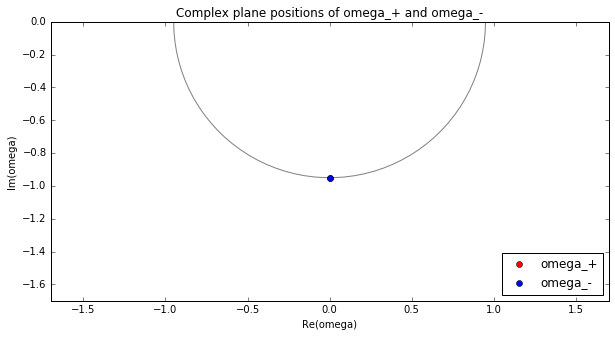

In [2]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sin, cos, pi, sqrt
import matplotlib.pyplot as plt

def plot_frequencies(omega0, gamma):
    ## (Plot the circular arc that the points lie on.)
    phi = linspace(-pi, 0, 50)
    plt.figure(figsize=(10,5))
    plt.plot(omega0*cos(phi), omega0*sin(phi), color="grey")
    rmax = 1.7

    ## Compute omega_+ and omega_- and plot in the complex plane.
    u = sqrt(abs(omega0**2 - gamma**2))
    if omega0 >= gamma:
        w1, w2 = -1j * gamma + u, -1j * gamma - u
    else:
        w1, w2 = -1j * (gamma - u), -1j * (gamma + u)
    
    ax = plt.subplot(1,1,1)
    plt.plot(w1.real, w1.imag, 'o', color="red", linewidth=4, label="omega_+")
    plt.plot(w2.real, w2.imag, 'o', color="blue", linewidth=4, label="omega_-")
    plt.title('Complex plane positions of omega_+ and omega_-')
    plt.xlabel('Re(omega)')
    plt.ylabel('Im(omega)')
    plt.xlim(-rmax, rmax)
    plt.ylim(min(-rmax, 1.1*w2.imag), 0)
    plt.axes().set_aspect('equal')
    ax.legend(numpoints=1, loc='lower right')

interact(plot_frequencies,
         omega0 = FloatSlider(min=0.5, max=1.5, step=0.05, value=1.0),
         gamma  = FloatSlider(min=0.0, max=2.0, step=0.05, value=0.1));

In particular, note the following features:

* For $\gamma = 0$ (zero damping), the two frequencies are both real, and take the values $\pm \omega_0$. This corresponds to undamped (or "simple") harmonic oscillation at the oscillator's natural frequency.
* If we increase $\gamma$ from zero with $\omega_0$ fixed, both $\omega_+$ and $\omega_-$ move downwards in the complex plane, along a circular arc.  Because the imaginary part of the frequencies are negative, this implies damped oscillation.
* At $\gamma = \omega_0$, the frequencies meet along the imaginary axis. We will have more to say about this case [later](#critical_damping).
* For $\gamma > \omega_0$, the two frequencies move apart along the imaginary axis. Purely imaginary frequencies correspond to a trajectory that simply decays without oscillating.  We'll say more about this kind of motion [later](#overdamped).

## General solution for the damped harmonic oscillator

For now, suppose $\omega_0 \ne \gamma$.  In the previous section, we found two classes of specific solutions, with complex frequencies $\omega_+$ and $\omega_-$:

$$z_+(t) = e^{-i\omega_+ t} \;\;\mathrm{and}\;\; z_-(t) = e^{-i\omega_- t}, \;\;\mathrm{where}\;\;\; \omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$

We can write down a more general solution consisting of a linear superposition of these specific solutions:

$$\begin{aligned}z(t) &= \psi_+ e^{-i\omega_+ t} + \psi_- e^{-i\omega_- t} \\ &= \psi_+ \, \exp\left[\left(-\gamma  - i \sqrt{\omega_0^2 - \gamma^2}\right)t\right] \; +\; \psi_- \, \exp\left[\left(-\gamma +i\sqrt{\omega_0^2 - \gamma^2}\right)t\right].\end{aligned}$$

This contains two undetermined complex parameters, $\psi_+$ and $\psi_-$. These are *independent* parameters since they are the coefficients that multiply different functions (the functions are different because $\omega_0 \ne \gamma$ implies that $\omega_+ \ne \omega_-$).  Hence, the above equation for $z(t)$ is a general solution for the complex damped harmonic oscillator equation.

To obtain the general solution to the *real* damped harmonic oscillator equation, we have to take the real part of the complex solution. The result can be further simplified depending on whether $\omega_0^2 - \gamma^2$ is positive or negative. This leads to what are called **under-damped solutions** and **over-damped solutions**, to be discussed in the following subsections.

What about if $\omega_0 = \gamma$? In this instance, $\omega_+ = \omega_-$, which means that $\psi_+$ and $\psi_-$ aren't independent parameters.  Therefore, the above equation for $z(t)$ isn't a valid general solution in this particular case!  Instead, the general solution is something called a **critically-damped solution**, which we will [discuss later](#critical_damping).

### Under-damped motion<a name="underdamped"></a>

For $\omega_0 > \gamma$, let us define, for convenience,

$$\Omega = \sqrt{\omega_0^2 - \gamma^2}.$$

Then we can simplify the real solution as follows:

$$\begin{align}x(t) &= \mathrm{Re}\left[z(t)\right] \\ &= e^{-\gamma t} \; \mathrm{Re}\left[\psi_+ \, e^{-i \Omega t} \,+\, \psi_- \, e^{i\Omega t}\right] \\ &= e^{-\gamma t} \left[ A\cos\left(\Omega t\right) + B \sin\left(\Omega t\right)\right], \;\;\mathrm{where}\;\; A, B \in \mathbb{R}\end{align}$$

With a bit of algebra, we can show that

$$A = \mathrm{Re}\left[\psi_+ + \psi_-\right], \quad B = \mathrm{Im}\left[\psi_+ - \psi_-\right].$$

The coefficients $A$ and $B$ act as two independent *real* parameters, so this is a valid general solution for the real damped harmonic oscillator equation.  Using the trigonometric formulas, the solution can be equivalently written as

$$x(t) = C e^{-\gamma t} \cos\left[\Omega t + \Phi\right],$$

with the parameters $C = \sqrt{A^2 + B^2}$ and $\Phi = - \tan^{-1}\left[B/A\right]$.

Either way, this is called an **under-damped solution**.  As shown below, the trajectory is an oscillation whose amplitude decreases with time.  The decrease in the amplitude can be visualized using a smooth "envelope" given by $\pm C e^{-\gamma t}$, which is drawn with dashes in the figure.  Inside this envelope, the trajectory oscillates with frequency $\Omega = \sqrt{\omega_0^2 - \gamma^2}$, which is slightly less than the natural frequency of oscillation $\omega_0$.

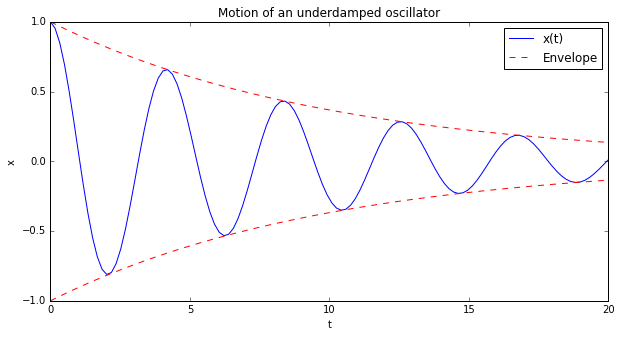

In [3]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, cos, sqrt, exp
import matplotlib.pyplot as plt

def plot_underdamped(omega0, gamma, C, phi):
    x0, t = 1.0, linspace(0, 20, 120)
    xe = C * exp(-gamma*t)
    x  = xe * cos(sqrt(omega0**2 - gamma**2)*t+phi)
    
    plt.figure(figsize=(10,5))
    plt.title('Motion of an underdamped oscillator')
    plt.plot(t, x, 'b', label='x(t)')
    ## Plot envelope
    ax = plt.subplot(1,1,1)
    plt.plot(t, xe, 'r--', label='Envelope')
    plt.plot(t, -xe, 'r--')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.xlim(t[0], t[-1])
    plt.ylim(-x0, x0)
    ax.legend(numpoints=1, loc='upper right')
    plt.show()

interact(plot_underdamped,
         omega0 = FloatSlider(min=0.5, max=1.5, step=0.02, value=1.0),
         gamma  = FloatSlider(min=0.0, max=0.5, step=0.02, value=0.1),
         C      = FloatSlider(min=0.0, max=1.0, step=0.05, value=1.0),
         phi    = FloatSlider(min=-3.14, max=3.14, step=0.002, value=0.0));

### Over-damped motion<a name="overdamped"></a>

For $\omega_0 < \gamma$, the square root term becomes imaginary.  It is convenient to define

$$\Gamma = \sqrt{\gamma^2 - \omega_0^2} \quad \Rightarrow \quad \sqrt{\omega_0^2 - \gamma^2} = i \Gamma.$$

Then the real solution simplifies in a different way:

$$\begin{align} x(t) &= \mathrm{Re}\left[z(t)\right] \\&= \mathrm{Re}\left[\psi_+ e^{\left(-\gamma  + \Gamma\right)t} + \psi_- e^{\left(-\gamma - \Gamma\right)t} \right] \\ &= C_+ e^{-(\gamma - \Gamma) t} + C_- e^{-(\gamma + \Gamma) t},\end{align}$$

where

$$C_\pm = \mathrm{Re}[\psi_\pm].$$

This is called an **over-damped** solution. The solution consists of two terms, both exponentially decaying in time, with $(\gamma-\Gamma)$ and $(\gamma + \Gamma)$ serving as the decay rates. Note that both decay rates are positive real numbers, because  $\Gamma < \gamma$ from the definition of $\Gamma$.  Also, note that the first decay rate $(\gamma - \Gamma)$ is a *decreasing* function of $\gamma$, whereas the second decay rate $(\gamma + \Gamma)$ is an *increasing* function of $\gamma$.

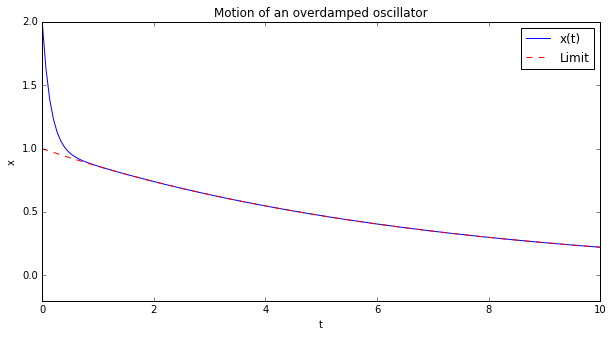

In [5]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sqrt, exp
import matplotlib.pyplot as plt

def plot_overdamped(omega0, gamma, C1, C2):
    x0, t = 2.0, linspace(0, 10, 150)

    G = sqrt(gamma**2 - omega0**2)
    xe = C1 * exp(-(gamma-G)*t)
    x  = xe + C2 * exp(-(gamma+G)*t)
    
    plt.figure(figsize=(10,5))
    plt.title('Motion of an overdamped oscillator')
    ax = plt.subplot(1,1,1)
    plt.plot(t, x, 'b', label='x(t)')
    plt.plot(t, xe, 'r--', label='Limit')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.xlim(t[0], t[-1])
    plt.ylim(-0.1*x0, x0)
    ax.legend(numpoints=1, loc='upper right')

interact(plot_overdamped,
         omega0= FloatSlider(min=0.1, max=1.0, step=0.05, value=1.0),
         gamma = FloatSlider(min=1.0, max=5.0, step=0.05, value=0.1),
         C1    = FloatSlider(min=0.0, max=1.0, step=0.05, value=1.0),
         C2    = FloatSlider(min=0.0, max=1.0, step=0.05, value=1.0));

The larger decay rate, $(\gamma + \Gamma)$, is associated with a faster-decaying exponential. Therefore, at long times the second term becomes negligible compared to the first term. Then the solution approaches the limit

$$x(t) \approx C_+ e^{-(\gamma - \Gamma) t} \qquad (\mathrm{large}\;\;t).$$

This limiting curve is shown as a red dash in the above figure.

This has an interesting implication: *the stronger the damping, the slower the effective decay rate at long times*.  Why does this happen? In the over-damped regime, the motion of the oscillator is dominated by the damping force rather than the spring force; as the oscillator tries to return to its equilibrium position $x = 0$, the damping acts against this motion.  Hence, the stronger the damping, the slower the decay to equilibrium.

This contrasts sharply with the [under-damped regime](#underdamped), where the spring force dominates the damping force. In that case, stronger damping speeds up the decay to equilibrium, by causing the kinetic energy of the oscillation to be dissipated more rapidly.

### Critical damping<a name="critical_damping"></a>

**Critical damping** occurs when $\omega_0 = \gamma$.  Under this special condition, [the solution that we previously derived](#ansatz) reduces to

$$z(t) = \left(\psi_+ + \psi_-\right) e^{-\gamma t}.$$

This has only *one* independent complex parameter, i.e. the parameter $(\psi_+ + \psi_-)$.  Therefore, it cannot be a general solution for the complex damped harmonic oscillator equation, which is still a second-order ODE.

We will not go into detail here regarding the procedure for finding the general solution for the critically-damped oscillator, leaving it as an [exercise](#exercises) for the interested reader. Basically, we can Taylor expand the solution on either side of the critical point, and then show that there is a solution of the form

$$z(t) = \left(A + B t\right)\, e^{-\gamma t},$$

which contains the desired two independent parameters.

The critically-damped solution contains an exponential decay constant of $\gamma$, which is the same as the decay constant for the [envelope function in the under-damped regime](#underdamped), and *smaller* than the (long-time) decay constants in the [over-damped regime](#overdamped).  Hence, we can regard the critically-damped solution as the *fastest-decaying non-oscillatory solution*.

This feature of critical damping is employed in many engineering contexts, the most familiar being automatic door closers. If the damping is too weak or the spring force is too strong (under-damped), the door will tend to slam shut, whereas if the damping is too strong or the spring force is too weak (under-damping), the door will take unnecessarily long to close.  Hence, door closers need to be tuned to a "sweet spot" that corresponds to the critical damping point.

## Stating the solution in terms of initial conditions

The general solution for the complex damped harmonic oscillator equation, which we [obtained above](#ansatz), contains two undetermined parameters which are the complex amplitudes of the "clockwise" and "counterclockwise" complex oscillations:

$$z(t) = \psi_+ e^{-i\omega_+ t} + \psi_- e^{-i\omega_- t}, \quad\mathrm{where} \;\; \omega_\pm =  -i\gamma  \pm \sqrt{\omega_0^2 - \gamma^2}.$$

However, mechanics problems are often expressed in terms of an **initial-value problem**, which expresses the state of the system at some initial time $t = 0$.  Suppose we are given $z(0) \equiv x_0$ and $\dot{z}(0) \equiv v_0$; then what is $z(t)$ in terms of $x_0$ and $v_0$?

We can solve the initial-value problem by finding $z(0)$ and $\dot{z}(0)$ in terms of the above general solution for $z(t)$.  The results are

$$\begin{aligned} z(0) &= \quad \psi_+ + \psi_- &= x_0& \\ \dot{z}(0) &= -i\omega_+ \psi_+ - i \omega_- \psi_- &= v_0&.\end{aligned}$$

These two equations can be combined into a 2x2 matrix equation:

$$\begin{bmatrix}1 & 1 \\ -i\omega_+ & -i\omega_-\end{bmatrix} \begin{bmatrix}\psi_+ \\ \psi_-\end{bmatrix} = \begin{bmatrix}x_0 \\ v_0\end{bmatrix}.$$

So long as the system is not at the critical point (i.e., $\omega_+ \ne \omega_-$), the matrix is non-singular, and we can invert it to obtain $\psi_\pm$:

$$\begin{bmatrix}\psi_+ \\ \psi_-\end{bmatrix} = \frac{1}{i(\omega_+-\omega_-)}\begin{bmatrix}-i\omega_-x_0 - v_0 \\ i\omega_+x_0 + v_0 \end{bmatrix}.$$

We can plug these coefficients back into the general solution. After some algebra, the result simplifies to

$$z(t) = e^{-\gamma t} \left[x_0 \cos(\Omega t) + \frac{\gamma x_0 + v_0}{\Omega} \, \sin(\Omega t)\right], \;\; \mathrm{where}\;\; \Omega \equiv \sqrt{\omega_0^2 - \gamma^2}.$$

For the under-damped case, $\Omega$ is real, and this solution is consistent with the one [we previously derived](#underdamped), except that it is now explicitly expressed in terms our initial conditions $x_0$ and $v_0$. As for the [over-damped case](#overdamped), we can perform the replacement

$$\Omega \rightarrow i \Gamma = i \sqrt{\gamma^2 - \omega_0^2}.$$

Then, using the [relationships between trigonometric and hyperbolic functions](00_mathfunctions.ipynb#hyperbolic), the solution can be re-written as

$$\begin{aligned}z(t) &= e^{-\gamma t} \left[x_0 \cosh(\Gamma t) + \frac{\gamma x_0 + v_0}{i\Gamma} \, i \sinh(\Gamma t)\right] \\ &= \left(\frac{x_0}{2} + \frac{\gamma x_0 + v_0}{2\Gamma}\right) e^{-(\gamma - \Gamma) t} + \left(\frac{x_0}{2} - \frac{\gamma x_0 + v_0}{2\Gamma}\right) e^{-(\gamma+\Gamma)t},\end{aligned}$$

which is again consistent with our [previous result](#overdamped).

In either case, so long as we plug in real values for $x_0$ and $v_0$, the solution is guaranteed to be real for all $t$.  That's to be expected, since the real solution is also one of the specific solutions for the complex harmonic oscillator equation. The resulting solution is plotted below.

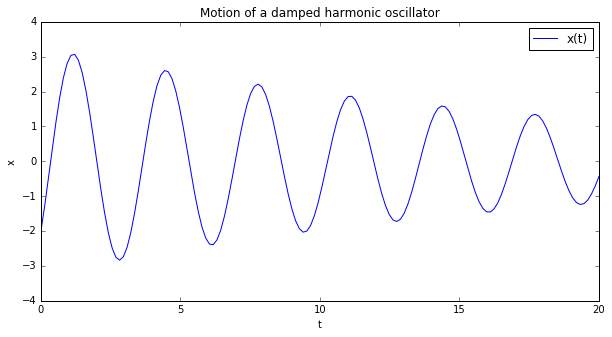

In [6]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sin, cos, sqrt, exp
import matplotlib.pyplot as plt
from math import ceil

def plot_oscillator(omega0, gamma, x0, v0):
    t = linspace(0, 20, 150)

    if omega0 > gamma:
        W = sqrt(omega0**2 - gamma**2)
        A, B = x0, (gamma*x0+v0)/W
        x = exp(-gamma*t) * (A * cos(W*t) + B * sin(W*t))
    elif omega0 < gamma:
        G = sqrt(gamma**2 - omega0**2)
        A = 0.5*(x0 + (gamma*x0 + v0)/G)
        B = 0.5*(x0 - (gamma*x0 + v0)/G)
        x = A*exp(-(gamma-G)*t) + B * exp(-(gamma+G)*t)
    else:
        x = (x0 + (v0+gamma*x0)*t) * exp(-gamma*t)

    plt.figure(figsize=(10,5))
    plt.title('Motion of a damped harmonic oscillator')
    plt.plot(t, x, 'b', label='x(t)')
    ax = plt.subplot(1,1,1)
    plt.xlabel('t')
    plt.ylabel('x')
    lim = max(ceil(1.1*max(abs(x))), 1.0)
    plt.ylim(-lim, lim)
    ax.legend(numpoints=1, loc='upper right')

interact(plot_oscillator,
         omega0 = FloatSlider(min=0.1, max=1.9, step=0.05, value=1.0),
         gamma  = FloatSlider(min=0.0, max=2.0, step=0.05, value=1.0),
         x0     = FloatSlider(min=-2., max=2.0, step=0.05, value=1.0),
         v0     = FloatSlider(min=-5., max=5.0, step=0.05, value=5.0));

## Exercises

<ol>
<li>In the [general solution for the complex damped harmonic oscillator equation](#ansatz), we encountered the complex frequencies<br/>$$\omega_\pm = -i\gamma \pm \sqrt{\omega_0^2 - \gamma^2}.$$<br/>For fixed $\omega_0$ and $\omega_0 > \gamma$ (under-damping), prove that $\omega_\pm$ lie along a circular arc in the complex plane.
</li>
<li>
Derive the [general solution for the critically-damped oscillator](#critical_damping), by following these steps:
<ol>
<li>Consider the complex ODE, in the under-damped regime $\omega_0 > \gamma$.  We [have shown](#ansatz) that the general solution has the form<br/>$$z(t) = \psi_+ \, \exp\left[\left(-\gamma  - i \sqrt{\omega_0^2 - \gamma^2}\right)t\right] \; +\; \psi_- \, \exp\left[\left(-\gamma +i\sqrt{\omega_0^2 - \gamma^2}\right)t\right]$$<br/>for some complex parameters $\psi_+$ and $\psi_-$.  Let us define the positive parameter $\varepsilon = \sqrt{\omega_0^2 - \gamma^2}$.  Re-write $z(t)$ in terms of $\gamma$ and $\varepsilon$ (i.e., eliminating $\omega_0$).</li>
<li>The expression for $z(t)$ is presently parameterized by the independent parameters $\psi_+$, $\psi_-$, $\varepsilon$, and $\gamma$.  We are free to re-define the parameters, by taking<br/>$$\begin{aligned}\alpha &= \psi_+ + \psi_- \\ \beta &= -i\varepsilon(\psi_+ - \psi_-).\end{aligned}$$<br/>Using these equations, express $z(t)$ using a new set of independent complex parameters, one of which is $\varepsilon$. You should explicitly identify the other independent parameters, including whether they are real or complex.</li>
<li>Taylor expand $z(t)$ in the parameter $\varepsilon$.  Then s\how that in the limit $\varepsilon \rightarrow 0$, $z(t)$ reduces to the [critically-coupled general solution](#critical_damping).</li>
</ol>
</li>
<li>Repeat the above derivation for the critically-damped solution, but starting from the over-damped regime $\gamma > \omega_0$.</li>
<li>A **parametric oscillator** is an oscillator whose spring "constant" varies with time, as described by the ordinary differential equation

$$\left[\frac{d^2}{dt^2} + 2\gamma\frac{d}{dt} + \Omega(t)^2\right]x(t) = 0, \quad\mathrm{where}\;\;\Omega(t) = \omega_0\left[1 + \alpha \cos(2\omega_1 t)\right].$$

The term "parametric" refers to the fact that the parameter $\Omega$, which is normally a constant, has been turned into a time-dependent quantity.

Suppose the "modulation frequency", $\omega_1$, is much smaller than the natural frequency $\omega_0$.  Let's make $x(t)$ complex, and look for a solution of the form

$$x(t) = \psi(t) \, e^{-i\omega_0 t},$$

where $\psi(t)$ is a complex "envelope function" which varies much more slowly than the $e^{-i\omega_0 t}$ factor.  Mathematically, the slowness of the variation is represented by the condition

$$\left|\frac{d^2\psi}{dt^2}\right| \ll \omega_0 \left|\frac{d\psi}{dt}\right|.$$

In such a situation, the second time derivative can be neglected; this is called the "slowly-varying envelope approximation".  By making this approximation, show that the parametric oscillator equation reduces to the form

$$\frac{d\left[\ln(\psi)\right]}{dt} = f(t),$$

and find $f(t)$.  Hence, solve for $\psi(t)$ and show that the oscillation ampitude $|\psi(t)|$ consists of an exponential decay overlaid on a sinusoidal modulation.
</li>
</ol>